In [1]:
import sqlite3
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect(r'data\LumbrasGigaBase2025-06.db3')
cursor = conn.cursor()

query = "SELECT name FROM sqlite_master WHERE type='table';"

cursor.execute(query)

tables = cursor.fetchall()
print("Tables found: ", tables)

conn.close()

Tables found:  [('Info',), ('Events',), ('sqlite_sequence',), ('Sites',), ('Players',), ('Games',)]


In [62]:
conn = sqlite3.connect(r'data\LumbrasGigaBase2025-06.db3')
games = pd.read_sql_query("SELECT * FROM Games LIMIT 10;", conn)
players = pd.read_sql_query("SELECT * FROM Players WHERE Elo != 'None';", conn)

print(players)

conn.close()

games

Empty DataFrame
Columns: [ID, Name, Elo]
Index: []


,ID,EventID,SiteID,Date,UTCTime,Round,WhiteID,WhiteElo,BlackID,BlackElo,WhiteMaterial,BlackMaterial,Result,TimeControl,ECO,PlyCount,FEN,Moves,PawnHome
0,1,1,1,1890.01.01,None,1,1,None,2,None,21,22,1-0,None,B00w,25,None,b'\x11\x11\t\t\x08\x00\x05\x10\x15\x18\x1a\x10...,61927
1,2,1,2,1804.01.01,None,1,3,None,4,None,37,32,0-1,None,B02b,26,None,b'\x03\x12\x0b\x14\x0b\t\x00\r\r\x13\x04\x1f\x...,61319
2,3,3,3,1804.??.??,None,?,4,None,3,None,32,37,1-0,None,A00l,27,None,b'\x11\x0c\x0e\x04\t\n\x05\x00\x0c\x0c\x10\x00...,34671
3,4,1,4,1864.01.01,None,1,5,None,6,None,34,34,0-1,None,A00k,32,None,b'\x04\x0c\x00\x0b\n\x00\x1d\r\x18\x11\x04\x1b...,59206
4,5,5,5,1895.??.??,None,?,7,None,8,None,10,10,1/2-1/2,None,A00j,40,None,b'\x03\x0b\x05\x0b\x18\x04\x10\x15\t\x00\x11\r...,58247
5,6,1,6,1897.01.01,None,1,9,None,10,None,29,29,0-1,None,A00r,40,None,b'\t\x0c\x13\x0b\x17\x0e\x15\x19\x01\x15\x02\x...,59329
6,7,1,4,1863.01.01,None,1,11,None,12,None,31,32,0-1,None,A00k,32,None,b'\x04\x0c\x10\x11\x16\n\t\x00\x00\x1b\x18\x10...,58182
7,8,8,8,1899.??.??,None,14,13,None,8,None,13,13,1/2-1/2,None,C01p,48,None,"b""\x04\x0c\x0b\x00\x00\x10\x11\t\x18\x1a''\x15...",25443
8,9,9,9,1864.01.01,None,1,14,None,15,None,35,30,0-1,None,A00k,28,None,b'\x04\x0c\x02\x0b\n\x1c\x14\x0f\x0f\x11#\x01\...,26435
9,10,1,9,1893.08.10,None,?,16,None,8,None,33,18,0-1,None,A00p,36,None,b'\t\x04\x13\x11\x00\t\x08\x08\t\x16\x02\t\x13...,41940


In [66]:
conn = sqlite3.connect(r'data\LumbrasGigaBase2025-06.db3')
info = pd.read_sql_query('SELECT Elo from Players WHERE Elo IS NOT NULL LIMIT 10;', conn)

conn.close()
info

,Elo


In [3]:
conn = sqlite3.connect(r'data\LumbrasGigaBase2025-06.db3')

query = r"""
SELECT 
    p1.Name AS White, p1.ID AS WhiteID, 
    p2.Name AS Black, p2.ID AS BlackID, 
    g.Result AS Result

FROM 
    Games g
JOIN 
    Players p1 ON p1.ID = g.WhiteID

JOIN 
    Players p2 ON p2.ID = g.BlackID;
"""

df = pd.read_sql_query(query, conn)

conn.close()

df



,White,WhiteID,Black,BlackID,Result
0,Goring,1,NN,2,1-0
1,"Remusat, Claire",3,"Napoleon, Bonaparte",4,0-1
2,"Napoleon, Bonaparte",4,"Remusat, Claire",3,1-0
3,Neuhaus,5,Hipp,6,0-1
4,"Blackburne, Joseph",7,"Schlechter, Carl",8,1/2-1/2
...,...,...,...,...,...
9570559,"Slizhevsky, Alexander",193790,Om Nagnath Lamkane,459497,1-0
9570560,"Torun, Kagan",499771,"Karabulut, Mustafa",522718,1-0
9570561,"Diao, Matthew Guo",484254,"Zhuang, Kyle",502439,0-1
9570562,"Amundsen, Ask",481728,"Thorisson, Benedikt",464442,1/2-1/2


In [4]:
"""hikaru_games = df[ (df['white'] == 'Nakamura, Hikaru') | (df['black'] == 'Nakamura, Hikaru') ]


hikaru_games"""

"hikaru_games = df[ (df['white'] == 'Nakamura, Hikaru') | (df['black'] == 'Nakamura, Hikaru') ]\n\n\nhikaru_games"

In [5]:
conn = sqlite3.connect(r'data\LumbrasGigaBase2025-06.db3')

names = pd.read_sql_query("SELECT Name from Players;", conn)
conn.close()

print(names)

                         Name
0                            
1              't Hart, Joost
2               't Hart,Joost
3                           *
4         07_2007)-CHATURANGA
...                       ...
526515          Šulek, Viliam
526516        ŽemliÃ¨ka, VÃ◫t
526517          Žitnik, Urban
526518         Žlindra, Aljaž
526519  Ηasiotis, Polichronis

[526520 rows x 1 columns]


In [4]:
df.to_csv(r'data\all_matchups.csv', index=False)

## First Graph Attempt


networkx is too slow, must use other library.

In [5]:
#import networkx as nx

df = pd.read_csv(r'data\all_matchups.csv')


df.head()


,White,WhiteID,Black,BlackID,Result
0,Goring,1,NN,2,1-0
1,"Remusat, Claire",3,"Napoleon, Bonaparte",4,0-1
2,"Napoleon, Bonaparte",4,"Remusat, Claire",3,1-0
3,Neuhaus,5,Hipp,6,0-1
4,"Blackburne, Joseph",7,"Schlechter, Carl",8,1/2-1/2


In [7]:
white = df['WhiteID'].to_list()
black = df['BlackID'].to_list()


E = [[white[i]-1, black[i]-1] for i in range(len(white))]
 
#G = nx.Graph(E)

In [ ]:
#plt.hist(degree)
#plt.show()

KeyboardInterrupt: 

## Let's try iGraph

In [8]:
g = ig.Graph(edges=E, directed=False)

degree = [g.degree(v) for v in g.vs]

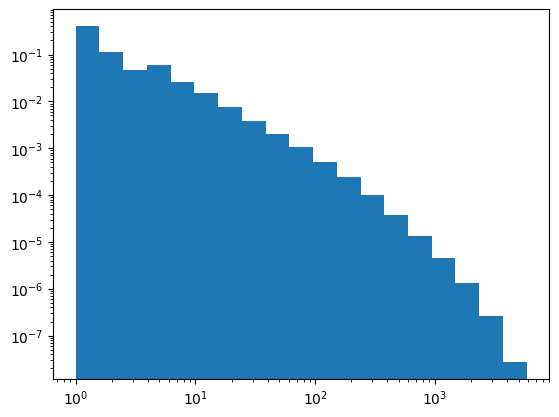

In [9]:
bins = np.logspace(np.log10(min(degree)), np.log10(max(degree)), 20)

plt.hist(degree, bins=bins, density=True)
plt.xscale('log')
plt.yscale('log')
plt.show()

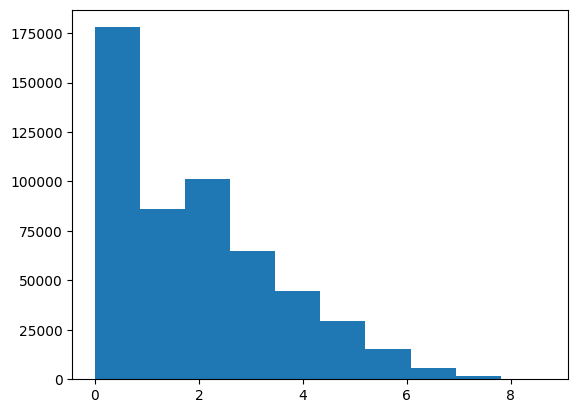

In [12]:
plt.clf()
plt.hist(np.log(degree))
plt.show()

# Giant Component

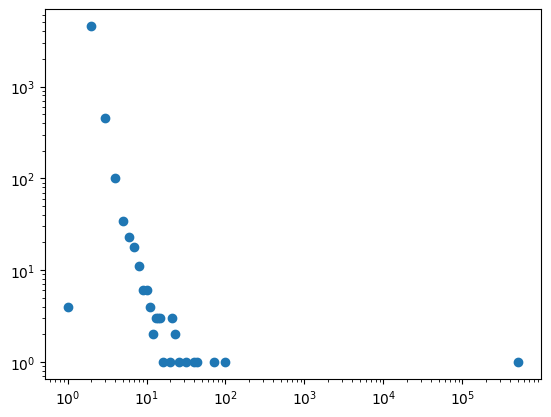

In [ ]:
components = g.components()

size = [len(c) for c in components]
freq = {}

for s in size:
    if s not in freq:
        freq[s] = 1
    else:
        freq[s] += 1

plt.scatter(freq.keys(), freq.values())
plt.xscale('log')
plt.yscale('log')
plt.show()

In [60]:
m = degree.index(max(degree))+1
df[(df['WhiteID'] == m) | (df['BlackID'] == m)]

,white,WhiteID,black,BlackID,result
22863,"Korchnoi, Viktor",6020,Shapkin,6021,1-0
24233,"Korchnoi, Viktor",6020,"Sakharov, Yuri N",6476,1-0
24279,"Korchnoi, Viktor",6020,V Zakharov,6490,1/2-1/2
27141,"Shianovsky, Vladislav I",6996,"Korchnoi, Viktor",6020,0-1
35816,"Korchnoi, Viktor",6020,"Giterman, M.",8529,1-0
...,...,...,...,...,...
6696168,"Korchnoi, Viktor",6020,"Gerber,R",250768,1-0
6770711,"Korchnoi, Viktor",6020,"Uhlmann, Wolfgang",17405,0-1
6798009,"Uhlmann, Wolfgang",17405,"Korchnoi, Viktor",6020,0-1
6805681,"Uhlmann, Wolfgang",17405,"Korchnoi, Viktor",6020,1-0


In [ ]:
col_specs = [
    (15, 76),  # Name (Starts at char 15, ends at 76)
    (84, 88)   # Tit  (Starts at char 84, ends at 88)
]

# The names of the columns we are extracting
col_names = ['Name', 'Title']
df = pd.read_fwf(r'data\standard_rating_list.txt', colspecs=col_specs, names=col_names, skiprows=1)
df['Title'] = df['Title'].fillna('')
df['Name'] = df['Name'].str.strip()
# Show the first few rows to verify
print("Extraction successful! Preview:")
print(df.head())
output_file = r'data\fide_titles.csv'
df.to_csv(output_file, index=False)
print(f"\nSaved extracted data to {output_file}")

Extraction successful! Preview:
                    Name Title
0  A B M Jobair, Hossain      
1             A C J John      
2         A Chakravarthy      
3              A Darshil      
4       A E M, Doshtagir      

Saved extracted data to data\fide_titles.csv


In [79]:
df[(df['Title'] != '')]

,Name,Title
37,"Aaberg, Anton",IM
47,"Aabling-Thomsen, Jakob",IM
105,Aadik Theophane Lenin,CM
148,Aaditya Dhingra,IM
192,Aadya Gowda,WCM
...,...,...
527993,"Zykina, Nadezhda",WFM
528011,"Zyla, Janusz",FM
528022,"Zylka, Stanislaw",IM
528028,"Zymberi, Astrit",FM


In [13]:
titles = pd.read_csv(r'data/fide_titles.csv')

In [26]:
pd.unique(titles['Title'])

array([nan, 'IM', 'CM', 'WCM', 'WFM', 'GM', 'WIM', 'FM', 'WGM'],
      dtype=object)

Implement edge-betweenness community detection for 2-9 communities, to see if it can detect titles.

In [27]:
print(g.ecount())
g.es['weight'] = 1
g.simplify(multiple=True, loops=False, combine_edges={'weight':'sum'})
print(g.ecount())

9570564
7635947


In [29]:
max(g.es['weight'])

456.0

In [ ]:
cliques = g.largest_cliques()

In [ ]:
for c in cliques:
    print(c)